# ------------------------Adult Census Income Data Analysis---------------------------------

# 1.Import necessary libraries and load the dataset and display random 5 samples.  Check the info of the data and write your findings

In [5]:

from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline


# data
df = pd.read_csv('adult.csv')

df.head(6)



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [2]:
# info the dataset
df.info()

# findings
print('''
Categorical and Numerical features

Categorical(object)
    - workclass 
    - education 
    - marital.status 
    - occupation 
    - relationship 
    - race 
    - sex 
    - native.country 
    - income 
    
Numerical features (int)
    - age 
    - fnlwgt
    - education.num
    - capital.gain
    - capital.loss
    - hours.per.week
----------------------------------
    - sex (male:1, female:0)
    - income (<=50K:0, >50K:1)
    

''')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Categorical and Numerical features

Categorical(object)
    - workclass 
    - education 
  

# ●	Exploratory Data Analysis 

In [3]:
# Replace " ? " by NaN (Handling ' ? ' symbols)


df.replace("?", np.nan, inplace = True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:

# Check for missing Data

missing_data = df.isnull()
missing_data.sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
# Deal with missing data
# Replace by  Mode

# Calculate Mode
workclass_mode = df['workclass'].value_counts().idxmax()
occupation_mode = df['occupation'].value_counts().idxmax()
native_country_mode = df['native.country'].value_counts().idxmax()


print("Mode of workclass: ",workclass_mode)
print("Mode of Occupation: ",occupation_mode)
print("Mode of natice.country: ",native_country_mode)

Mode of workclass:  Private
Mode of Occupation:  Prof-specialty
Mode of natice.country:  United-States


In [6]:
#replace the missing categorical values by the most frequent value

df["workclass"].replace(np.nan, workclass_mode, inplace = True)
df["occupation"].replace(np.nan, occupation_mode, inplace = True)
df["native.country"].replace(np.nan, native_country_mode, inplace = True)

In [7]:
# one-hot-encoding : sex | income features
df.sex.value_counts()  # male (21790) | female (10771) => male = 1, female = 0
df.income.value_counts()  # <=50K (24720) | >50K (7841) => <50K = 1, >50K = 0

df.sex.replace({'Male': 1, 'Female': 0}, inplace=True)  # sex feature
df.income.replace({'<=50K': 1, '>50K': 0}, inplace=True)  # income feature


# 2.What is the average age of males and females in the data? 

In [8]:
print ("AVERAGE AGE OF MALES and FEMALES")


df.groupby('sex').age.mean().to_frame().reset_index(drop=False)




AVERAGE AGE OF MALES and FEMALES


,sex,age
0,0,36.858230
1,1,39.433547


# 3.Identify the qualifications of most of the individuals and display it using an appropriate plot

HS-grad- qualification is having most of the individual of 10501
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


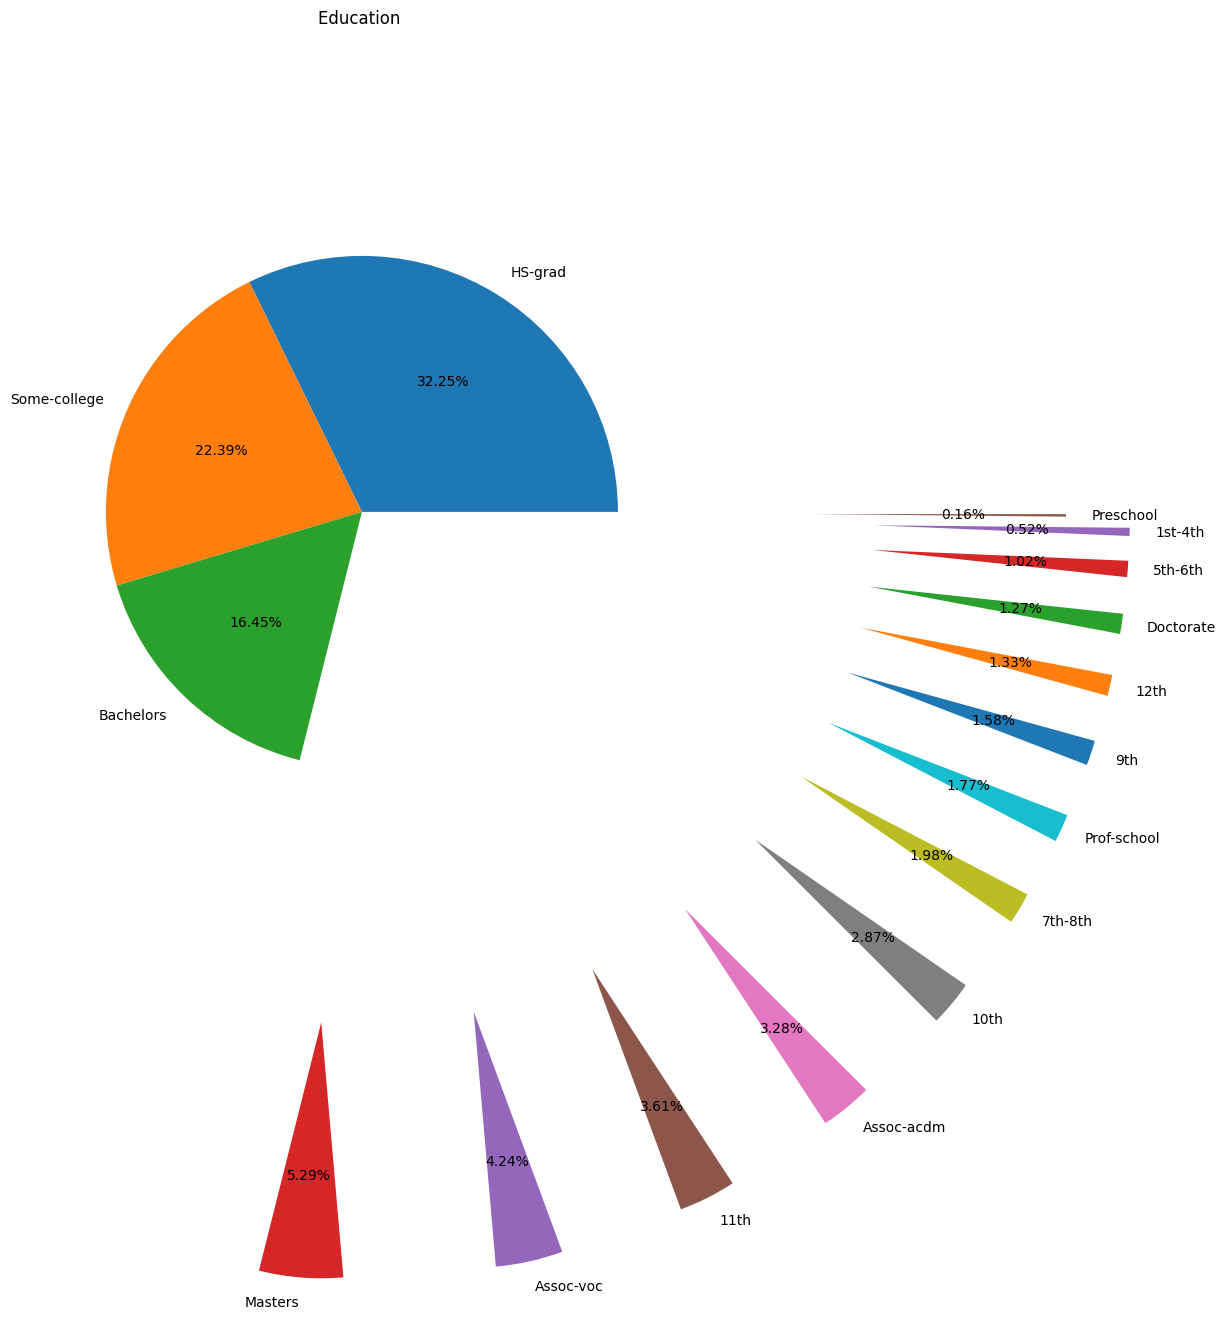

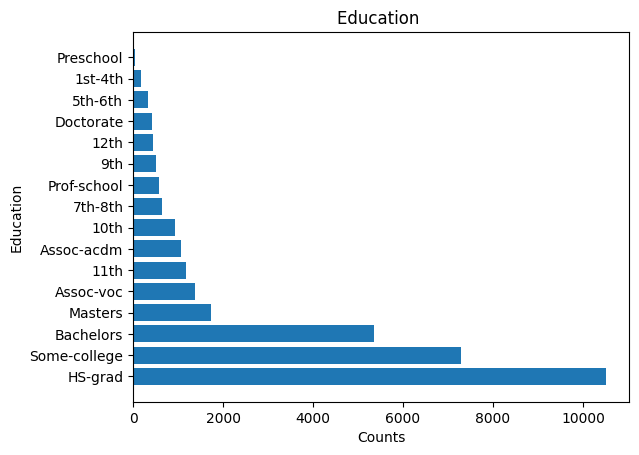

In [9]:

print("HS-grad- qualification is having most of the individual of 10501")

# plot
data = df.education.value_counts()
print(data)

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.axis('equal')
ax.pie(data,labels=data.index,autopct='%1.2f%%', explode=[0,0,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.75])
plt.title('Education ')
plt.show()

plt.barh(data.index,data.values)
plt.ylabel('Education')
plt.xlabel('Counts')
plt.title('Education ')
plt.show()

# 4.Find the middle most observation of age for different working classes

In [10]:

print('Middle most observation of age for particular working classes')

pd.pivot_table(data=df,index='workclass',values='age',aggfunc={'age':np.median}).reset_index()



Middle most observation of age for particular working classes


,workclass,age
0,Federal-gov,43
1,Local-gov,41
2,Never-worked,18
3,Private,35
4,Self-emp-inc,45
5,Self-emp-not-inc,44
6,State-gov,39
7,Without-pay,57


# 5.What is the percentage of the Asian-Pac-Islander race people in the data?

In [11]:

print('There are 3.190 % of the Asian-Pac-Islander race people in the data')

df['race'].value_counts()['Asian-Pac-Islander']*100/df['race'].count()

There are 3.190 % of the Asian-Pac-Islander race people in the data


3.190933939375326

# 6.Which occupation has more variability in the working hours? 

In [24]:

data = df[['hours.per.week','occupation']].groupby('occupation').agg('var').reset_index()
print(data)

print("Doctorate- occupation has more variability in the working hours with 227.54")

           occupation  hours.per.week
0        Adm-clerical       91.964888
1        Armed-Forces      198.000000
2        Craft-repair       81.939394
3     Exec-managerial      123.412395
4     Farming-fishing      299.987814
5   Handlers-cleaners      111.946104
6   Machine-op-inspct       57.648955
7       Other-service      161.442544
8     Priv-house-serv      261.939597
9      Prof-specialty      200.595304
10    Protective-serv      152.072728
11              Sales      175.202547
12       Tech-support      112.001859
13   Transport-moving      161.833503
Doctorate- occupation has more variability in the working hours with 227.54


# 7.What is the range of the middle 50% of working hours per week?

In [13]:
data = df['hours.per.week'].describe()  

data = df['hours.per.week'].quantile(0.50) 
print(f"The range of middle 50% is {data} of working hours per week")


The range of middle 50% is 40.0 of working hours per week


# 8. Are there any negatively skewed features? Support your answer with a metric and the plot.

In [14]:
df.skew()

C:\Users\prana\AppData\Local\Temp\ipykernel_24836\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                0.558743
fnlwgt             1.446980
education.num     -0.311676
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
income            -1.212430
dtype: float64

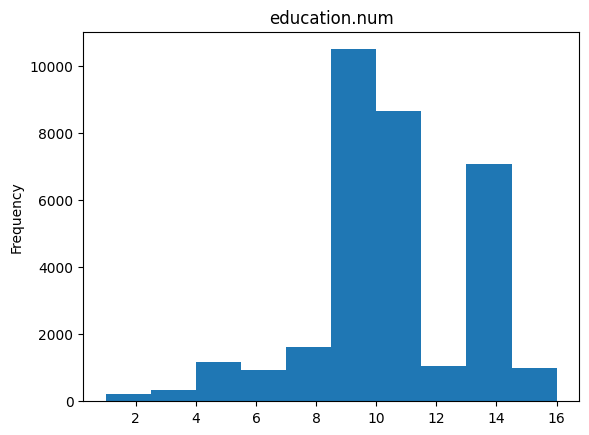

In [26]:

data = df.skew(numeric_only=True)
data = data[data < 0]



# plot
df[data.index[0]].plot(kind='hist')
plt.title(data.index[0])
plt.show()

# 9.Identify the presence of extreme values in age using visualization techniques.

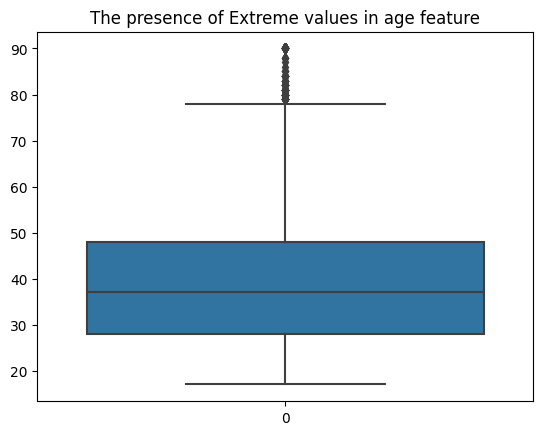

In [16]:
sns.boxplot(df['age']) # boxplot is efficient and clean to represent the outliers
plt.title('The presence of Extreme values in age feature')
plt.show()

# 10.Is there any effect of age on the working hours of a person? Support your answer with a metric and the plot.

There is a cause and effect relationship between age on a particular working hours of a person
but we can say there is a association of 0.06876
Inorder to support the above theory we have to use linear regression to check whether there is any effect or not
The weight of the age towards hours.per.week is 0.06
so we can say,there is a increase in age the impact of hours.per.weeek is 0.06


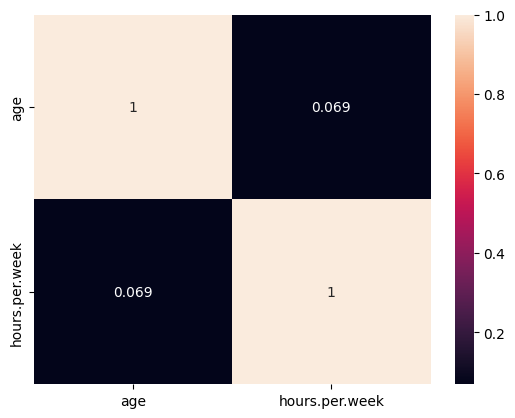

In [17]:
print('''There is a cause and effect relationship between age on a particular working hours of a person
but we can say there is a association of 0.06876
Inorder to support the above theory we have to use linear regression to check whether there is any effect or not
The weight of the age towards hours.per.week is 0.06
so we can say,there is a increase in age the impact of hours.per.weeek is 0.06''')
      
# plot : heat maps
sns.heatmap(df[['age', 'hours.per.week']].corr(), annot=True)
plt.show()

# 11.Is there any individual with age less than 18 and capital loss less than 100?

In [28]:
print('There are exactly "385" individuals with "age less than 18" and "capital loss less than 100"')

data = df[(df['age']<18) & (df['capital.loss']<100)]
data



There are exactly "385" individuals with "age less than 18" and "capital loss less than 100"


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1680,17,Private,304873,10th,6,Never-married,Prof-specialty,Own-child,White,0,34095,0,32,United-States,1
3987,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,White,1,2176,0,18,United-States,1
4151,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,1,1055,0,24,United-States,1
4154,17,Private,333100,10th,6,Never-married,Prof-specialty,Own-child,White,1,1055,0,30,United-States,1
4156,17,Private,103851,11th,7,Never-married,Adm-clerical,Own-child,White,0,1055,0,20,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31869,17,Private,256173,10th,6,Never-married,Prof-specialty,Own-child,White,0,0,0,15,United-States,1
31948,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,0,0,0,25,United-States,1
32035,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,0,0,0,35,United-States,1
32310,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,1,0,0,25,United-States,1


# 12.Which occupation has the highest number of males?

In [19]:
print("Craft-repair occupation has the highest number of 3877 males")
data = df.groupby('occupation')
data = data['sex'].value_counts()[data['sex'].value_counts() == data['sex'].value_counts().max()]
data




Craft-repair occupation has the highest number of 3877 males


occupation    sex
Craft-repair  1      3877
Name: sex, dtype: int64

# 13.Analyze the trend of the capital gain amount for different educational qualifications and write your observations.

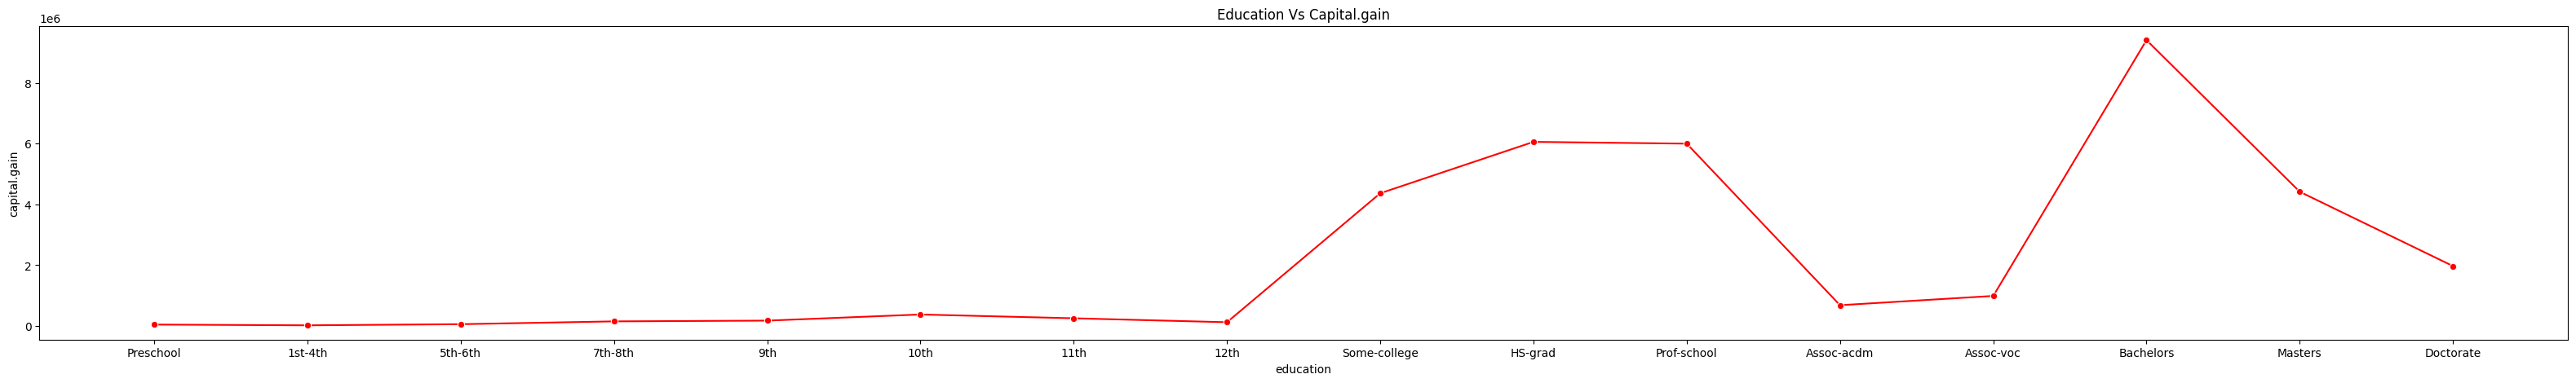


# Interpretation
- Bachelors education having more and high capital.gain of 9404984
- There is a turning point after 12th of sudden jump to 123010 there is capital.gain has improved gradually before it was linear and constant
- But there is drop after Prof-school which is 'Assoc-acdm','Assoc-voc' and after there is again jump in the bachelors
- We can say, those two categories are having a rough capital.gain 

# Conclusion
Through out education time-period
    - there is rough time in Assoc-acdm, Assoc-voc & Masters, Doctorate
    - there is good time after 12th and Assoc-voc



In [20]:


data = df.groupby('education')['capital.gain'].sum().reset_index()
data['education'] = pd.Categorical(data['education'], ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Some-college','HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Bachelors','Masters','Doctorate'])
# print(data)

# plot : line 
fig, ax = plt.subplots(figsize=(40, 5))
sns.lineplot(x=data['education'],y=data['capital.gain'],marker='o',color='r',ax=ax)
plt.title('Education Vs Capital.gain')
plt.show()

# observations
print('''
# Interpretation
- Bachelors education having more and high capital.gain of 9404984
- There is a turning point after 12th of sudden jump to 123010 there is capital.gain has improved gradually before it was linear and constant
- But there is drop after Prof-school which is 'Assoc-acdm','Assoc-voc' and after there is again jump in the bachelors
- We can say, those two categories are having a rough capital.gain 

# Conclusion
Through out education time-period
    - there is rough time in Assoc-acdm, Assoc-voc & Masters, Doctorate
    - there is good time after 12th and Assoc-voc
''')

# 14.Compare the working hours for each working class and write your observations.

In [21]:

data = pd.pivot_table(data=df,index='workclass',values='hours.per.week',aggfunc={'hours.per.week':['count','sum','max','min','mean','median','var','std']}).T

# coefficent of variation : mean / std
m = df.groupby('workclass')['hours.per.week'].mean()
s = df.groupby('workclass')['hours.per.week'].std()

data = m / s
print(data.sort_values(ascending=False),end='\n\n')
print(f'On an average, The working class has {data.mean()}')

# observation
print("""
'Federal-gov'       : there is no much difference between mean and median of 1.379167 and ranges from 4 - 99
'Local-gov'         : there is no much difference between mean and median of 0.9828 and ranges from 2 - 99
'Never-worked'      : there are extreme values in the data so the mean and median vary of 6.571429 and ranges from 4 - 40
'Private'           : there is no much difference between mean and median of 0.267096 and ranges from 1 - 99
'Self-emp-inc'      : there are extreme values in the data so the mean and median vary of 1.1819 and ranges from 1 - 99
'Self-emp-not-inc'  : there are extreme values in the data so the mean and median vary of 4.421881 and ranges from 1 - 99 
'State-gov'         : there is no much difference between mean and median of 0.968413 and ranges from 1 - 99
'Without-pay'       : there are extreme values in the data so the mean and median vary of 5.214286 and ranges from 10 - 65   
""")

print("""We can compare the working hours for each working class by coefficient of variation
- The Category "Federal-gov" is working higher than the remaining working class
- The Category "Never-worked" is working lower than the remaining working class
""")

workclass
Federal-gov         4.681640
Local-gov           3.804723
Self-emp-inc        3.511988
Private             3.366352
State-gov           3.336885
Self-emp-not-inc    2.663988
Without-pay         1.884691
Never-worked        1.872007
Name: hours.per.week, dtype: float64

On an average, The working class has 3.1402842511273694

'Federal-gov'       : there is no much difference between mean and median of 1.379167 and ranges from 4 - 99
'Local-gov'         : there is no much difference between mean and median of 0.9828 and ranges from 2 - 99
'Never-worked'      : there are extreme values in the data so the mean and median vary of 6.571429 and ranges from 4 - 40
'Private'           : there is no much difference between mean and median of 0.267096 and ranges from 1 - 99
'Self-emp-inc'      : there are extreme values in the data so the mean and median vary of 1.1819 and ranges from 1 - 99
'Self-emp-not-inc'  : there are extreme values in the data so the mean and median vary of 4.4218

# 15.Is there an all male profession according to the data?

In [22]:
data = pd.pivot_table(df,index=['sex','occupation'],aggfunc='count').reset_index()
data

data = df.groupby(['occupation','sex'])['sex'].count()

d = {}
for i in data.index:
    if i[0] in d:
        d[i[0]].append(i[1])
    else:
        d[i[0]] = [i[1]]

# checking the one value
data = [(i,d[i][0],data[i][1]) for i in d if len(d[i])==1 and d[i][0]==1][0]
print(data)

# # representation
print(f'There is an all male profession according to the data {data[0]} with count of {data[2]}')

('Armed-Forces', 1, 9)
There is an all male profession according to the data Armed-Forces with count of 9
